# New Section

In [ ]:
%matplotlib inline

In [ ]:
from pylab import imshow

In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
import torch

In [ ]:
import albumentations as albu

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
!pip install iglovikov_helper_functions

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:00
  Created wheel for jpeg4py: filename=jpeg4py-0.1.4-py3-none-any.whl size=8422 sha256=929f97402c35d93c0031c47b5a842b5ea0723371d007b8d5f814be6332b3101f
  Stored in directory: /root/.cache/pip/wheels/30/a2/1a/3fa89c7bfd9af5d22f774a561ea7d9564b7d7448fe4c9921ca
Successfully built jpeg4py


In [ ]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [ ]:
!wget https://firebasestorage.googleapis.com/v0/b/my-images-d22b2.appspot.com/o/ImportedPhoto.759572236.043355.jpeg?alt=media&token=d400165d-23ae-404c-8083-597ea39beb95 > /dev/null

--2025-01-26 16:48:27--  https://firebasestorage.googleapis.com/v0/b/my-images-d22b2.appspot.com/o/ImportedPhoto.759572236.043355.jpeg?alt=media
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 142.250.152.95, 172.217.214.95, 173.194.64.95, ...
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|142.250.152.95|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-01-26 16:48:27 ERROR 403: Forbidden.



In [ ]:
!pip install cloths_segmentation  > /dev/null

In [ ]:
from cloths_segmentation.pre_trained_models import create_model

In [ ]:
model = create_model("Unet_2020-10-30")

Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip
100%|██████████| 47.0M/47.0M [00:02<00:00, 19.7MB/s]
/usr/local/lib/python3.11/dist-packages/torch/hub.py:870: FutureWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  return _legacy_zip_load(cached_file, model_dir, map_location, weights_only)


In [ ]:
model.eval();

In [ ]:
!wget -O ImportedPhoto.jpeg "https://firebasestorage.googleapis.com/v0/b/my-images-d22b2.appspot.com/o/ImportedPhoto.759572236.043355.jpeg?alt=media&token=d400165d-23ae-404c-8083-597ea39beb95"
image = load_rgb("ImportedPhoto.jpeg")

--2025-01-26 16:51:07--  https://firebasestorage.googleapis.com/v0/b/my-images-d22b2.appspot.com/o/ImportedPhoto.759572236.043355.jpeg?alt=media&token=d400165d-23ae-404c-8083-597ea39beb95
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 173.194.206.95, 142.250.125.95, 209.85.200.95, ...
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|173.194.206.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236427 (231K) [image/jpeg]
Saving to: ‘ImportedPhoto.jpeg’

ImportedPhoto.jpeg  100%[===================>] 230.89K  --.-KB/s    in 0.002s  

2025-01-26 16:51:08 (92.6 MB/s) - ‘ImportedPhoto.jpeg’ saved [236427/236427]



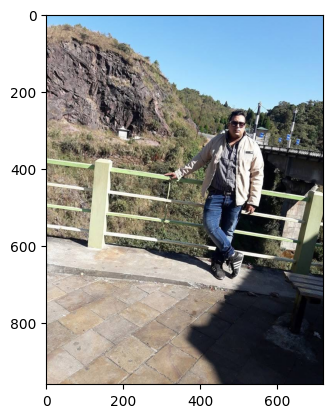

In [ ]:
imshow(image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [ ]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [ ]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [ ]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [ ]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [ ]:
mask = unpad(mask, pads)

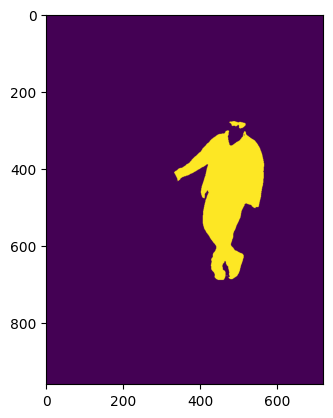

In [ ]:
imshow(mask)

In [ ]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)

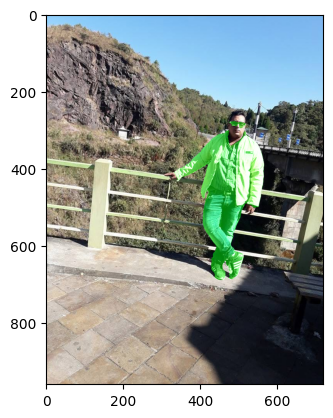

In [ ]:
imshow(dst)

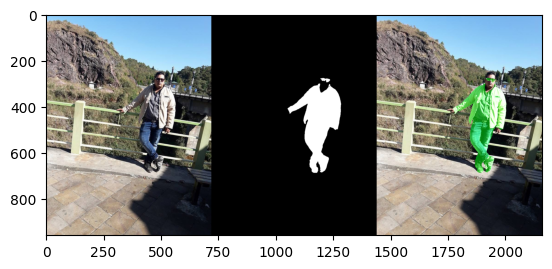

In [ ]:
imshow(np.hstack([image, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255, dst]))

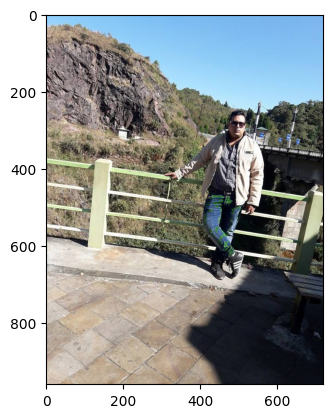

In [ ]:
import cv2
import numpy as np

# Assume 'mask' contains the segmentation output (0: background, 1: clothes)
# You need to define how to separate pants and shirt from 'mask'
# This is an example, you might need to adjust the conditions based on your specific mask values

# Example: Assuming pixels with value 1 represent pants in your mask
mask_pants = np.where(mask == 1, 255, 0).astype(np.uint8)  # Create mask for pants

# Isolate pants region
pants_region = cv2.bitwise_and(image, image, mask=mask_pants)

# Change red color of pants using HSV color space
hsv_pants = cv2.cvtColor(pants_region, cv2.COLOR_BGR2HSV)

# Define range for red color in HSV
lower_red = np.array([0, 50, 50])  # Adjust lower bound as needed
upper_red = np.array([10, 255, 255])  # Adjust upper bound as needed

# Create a mask for red pixels
red_mask = cv2.inRange(hsv_pants, lower_red, upper_red)

# Modify hue of red pixels (example: shift by 50 degrees)
hsv_pants[red_mask > 0, 0] = (hsv_pants[red_mask > 0, 0] + 50) % 180

new_pants = cv2.cvtColor(hsv_pants, cv2.COLOR_HSV2BGR)

# Combine modified pants region back into the original image
final_image = image.copy()
final_image[mask_pants > 0] = new_pants[mask_pants > 0]

imshow(final_image)  # Display the final image with changed pant color

In [ ]:
!pip install fastapi uvicorn python-multipart Pillow numpy opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from PIL import Image
import io

def change_pant_color_function(image_bytes, new_color_hsv):
    """Changes the color of pants in an image.

    Args:
        image_bytes: The image data as bytes.
        new_color_hsv: The desired pant color in HSV format (tuple of H, S, V).

    Returns:
        The modified image as bytes.
    """
    # Read the image from bytes
    image = Image.open(io.BytesIO(image_bytes))
    image = np.array(image)

    # Your existing code for pants segmentation (assuming 'mask' is available):
    # ... (Your segmentation code to get 'mask') ...

    # Create mask for pants (assuming pixels with value 1 represent pants)
    mask_pants = np.where(mask == 1, 255, 0).astype(np.uint8)

    # Isolate pants region
    pants_region = cv2.bitwise_and(image, image, mask=mask_pants)

    # Convert pants region to HSV
    hsv_pants = cv2.cvtColor(pants_region, cv2.COLOR_BGR2HSV)

    # Change color of pants to new_color_hsv
    hsv_pants[mask_pants > 0] = new_color_hsv

    # Convert back to BGR
    new_pants = cv2.cvtColor(hsv_pants, cv2.COLOR_HSV2BGR)

    # Combine modified pants region back into the original image
    final_image = image.copy()
    final_image[mask_pants > 0] = new_pants[mask_pants > 0]

    # Convert the processed image back to PIL Image
    final_image = Image.fromarray(final_image)

    # Save the image to a buffer
    buffer = io.BytesIO()
    final_image.save(buffer, format="JPEG")  # Assuming JPEG format
    buffer.seek(0)

    # Return the image as bytes
    return buffer.read()

In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import Response

app = FastAPI()

@app.post("/change_pant_color/")
async def change_pant_color(image: UploadFile = File(...)):
    image_bytes = await image.read()
    new_color_hsv = (50, 100, 100)  # Example: Change to green (adjust H, S, V as needed)

    modified_image_bytes = change_pant_color_function(image_bytes, new_color_hsv)

    return Response(content=modified_image_bytes, media_type="image/jpeg")

In [ ]:
!pip install pyngrok


In [ ]:
!pip install fastapi uvicorn python-multipart Pillow numpy opencv-python pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install fastapi uvicorn python-multipart Pillow numpy opencv-python pyngrok cloths_segmentation iglovikov_helper_functions
import cv2
import numpy as np
from PIL import Image
import io
from fastapi import FastAPI, File, UploadFile, Form
from fastapi.responses import Response
import uvicorn
import nest_asyncio
from pyngrok import ngrok
import colorsys  # Import for hue to hex conversion

# Import necessary libraries for segmentation
from cloths_segmentation.pre_trained_models import create_model
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image
import torch
import albumentations as albu

# Load the segmentation model
model = create_model("Unet_2020-10-30")
model.eval()

# Define the transform for the segmentation model
transform = albu.Compose([albu.Normalize(p=1)], p=1)

# Function to convert hue to hex color code
def hue_to_hex(hue):
    """Converts a hue value to a hexadecimal color code.

    Args:
        hue: The hue value (0-360).

    Returns:
        The hexadecimal color code (e.g., '#ff0000').
    """
    rgb = colorsys.hsv_to_rgb(hue / 360.0, 1.0, 1.0)
    hex_color = '#%02x%02x%02x' % (int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))
    return hex_color


def change_pant_color_function(image_bytes, new_color_hsv):
    """Changes the color of pants in an image while preserving other parts.

    Args:
        image_bytes: The image data as bytes.
        new_color_hsv: The desired pant color in HSV format (tuple of H, S, V).

    Returns:
        The modified image as bytes.
    """
    # Read the image from bytes
    image = Image.open(io.BytesIO(image_bytes))
    image = np.array(image)
    padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)
    x = transform(image=padded_image)["image"]
    x = torch.unsqueeze(tensor_from_rgb_image(x), 0)
    with torch.no_grad():
        prediction = model(x)[0][0]
    mask = (prediction > 0).cpu().numpy().astype(np.uint8)
    mask = unpad(mask, pads)

    # Create mask for pants (assuming pixels with value 1 represent pants)
    mask_pants = np.where(mask == 1, 255, 0).astype(np.uint8)

    # Isolate pants region
    pants_region = cv2.bitwise_and(image, image, mask=mask_pants)

    # Convert pants region to HSV
    hsv_pants = cv2.cvtColor(pants_region, cv2.COLOR_BGR2HSV)

    # Change color of pants to new_color_hsv where mask is applied
    hsv_pants[mask_pants > 0] = new_color_hsv

    # Convert back to BGR
    new_pants = cv2.cvtColor(hsv_pants, cv2.COLOR_HSV2BGR)

    # Combine modified pants region back into the original image
    final_image = image.copy()
    final_image[mask_pants > 0] = new_pants[mask_pants > 0]

    # Convert the processed image back to PIL Image
    final_image = Image.fromarray(final_image)

    # Save the image to a buffer
    buffer = io.BytesIO()
    final_image.save(buffer, format="JPEG")  # Assuming JPEG format
    buffer.seek(0)

    # Return the image as bytes
    return buffer.read()


app = FastAPI()

@app.post("/change_pant_color/")
async def change_pant_color(image: UploadFile = File(...),
                            hue: int = Form(..., description="Hue value (0-180)"),
                            saturation: int = Form(..., description="Saturation value (0-255)"),
                            value: int = Form(..., description="Value value (0-255)")):
    image_bytes = await image.read()
    new_color_hsv = (hue, saturation, value)  # Create new_color_hsv tuple

    modified_image_bytes = change_pant_color_function(image_bytes, new_color_hsv)

    return Response(content=modified_image_bytes, media_type="image/jpeg")




if __name__ == "__main__":
    import nest_asyncio
    nest_asyncio.apply()
    # Set your ngrok auth token
    ngrok.set_auth_token("2sBN1TbrWwPHgeQ1m4eSYfexXvP_2aWMGHBjWC6cFTUq3eWw1")  # Replace with your actual token
    # Open a ngrok tunnel to the FastAPI server
    ngrok_tunnel = ngrok.connect(8000)
    print('Public URL:', ngrok_tunnel.public_url)
    uvicorn.run("__main__:app", host="0.0.0.0", port=8000)

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/torch/hub.py:870: FutureWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  return _legacy_zip_load(cached_file, model_dir, map_location, weights_only)
INFO:     Started server process [5965]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


Public URL: https://e526-34-80-70-71.ngrok-free.app
INFO:     49.37.33.43:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     49.37.33.43:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     49.37.33.43:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     49.37.33.43:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     49.37.33.43:0 - "POST /change_pant_color/ HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [5965]


In [ ]:
!pip install gradio fastapi uvicorn python-multipart Pillow numpy opencv-python pyngrok cloths_segmentation iglovikov_helper_functions gradio
import cv2
import numpy as np
from PIL import Image
import io
import gradio as gr  # Import Gradio

# Import necessary libraries for segmentation
from cloths_segmentation.pre_trained_models import create_model
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image
import torch
import albumentations as albu

# Load the segmentation model
model = create_model("Unet_2020-10-30")
model.eval()

# Define the transform for the segmentation model
transform = albu.Compose([albu.Normalize(p=1)], p=1)


def change_pant_color_function(image_np, hue, saturation, value):
    """Changes the color of pants in an image while preserving other parts.

    Args:
        image_np: The image data as a NumPy array.
        hue: The desired hue value (0-180).
        saturation: The desired saturation value (0-255).
        value: The desired value value (0-255).

    Returns:
        The modified image as a NumPy array.
    """
    image = image_np  # Assign image_np to image for consistent naming

    padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)
    x = transform(image=padded_image)["image"]
    x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

    with torch.no_grad():
        prediction = model(x)[0][0]

    mask = (prediction > 0).cpu().numpy().astype(np.uint8)
    mask = unpad(mask, pads)

    # Create mask for pants (assuming pixels with value 1 represent pants)
    mask_pants = np.where(mask == 1, 255, 0).astype(np.uint8)

    # Isolate pants region
    pants_region = cv2.bitwise_and(image, image, mask=mask_pants)

    # Convert pants region to HSV
    hsv_pants = cv2.cvtColor(pants_region, cv2.COLOR_BGR2HSV)

    # Change color of pants to new_color_hsv where mask is applied
    new_color_hsv = (hue, saturation, value)
    hsv_pants[mask_pants > 0] = new_color_hsv

    # Convert back to BGR
    new_pants = cv2.cvtColor(hsv_pants, cv2.COLOR_HSV2BGR)

    # Combine modified pants region back into the original image
    final_image = image.copy()
    final_image[mask_pants > 0] = new_pants[mask_pants > 0]

    # Convert back to PIL Image for Gradio
    final_image = Image.fromarray(final_image)

    return final_image

iface = gr.Interface(
    fn=change_pant_color_function,
    inputs=[
        gr.Image(type="numpy"),  # Input image
        gr.Slider(0, 180, value=50, step=1, label="Hue"),
        gr.Slider(0, 255, value=100, step=1, label="Saturation"),
        gr.Slider(0, 255, value=100, step=1, label="Value"),
    ],
    outputs=gr.Image(type="pil"),  # Output image
    title="Change clothing Color",
    description="Upload an image and modify the color of the clothing using Ai"
)

iface.launch(share=True)  # Launch the Gradio interface and share it

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 16.8 MB/s eta 0:00:00
   ━━━━

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip
100%|██████████| 47.0M/47.0M [00:00<00:00, 101MB/s]
/usr/local/lib/python3.11/dist-packages/torch/hub.py:870: FutureWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  return _legacy_zip_load(cached_file, model_dir, map_location, weights_only)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://50aa73c4306a344ebd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
